<FONT SIZE =24>Database Implementation</FONT>

Mounting my google drive here

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Writing a code code to print filename date it was published and count of supervised , semi supervised , unsupervised and meta-learning

we need to insert path to directory here

In [2]:
import os
import re
import pandas as pd

# give the directory path containing the text files
dir_path = '/content/drive/MyDrive/Big_data_assignment_files/wikipedia-ml'

results1 = []


for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        
        match = re.search(r'\d{4}_\d{1,2}_\d{1,2}', filename)
        if match:
            date_published = match.group()
            print(f'File: {filename}, Date Published: {date_published}')
        else:
            print(f'File: {filename}, Date Published not found')

        
        with open(os.path.join(dir_path, filename), 'r') as f:
            contents = f.read()
            supervised_count = contents.count('supervised')
            semi_supervised_count = contents.count('semi-supervised')
            unsupervised_count = contents.count('unsupervised')
            meta_learning_count = contents.count('meta-learning')

        results1.append((filename, date_published, supervised_count, semi_supervised_count, unsupervised_count, meta_learning_count))

# CREATING THE DATA FRAME
df_1 = pd.DataFrame(results1, columns=['Filename', 'Date Published', 'Supervised Count', 'Semi-Supervised Count', 'Unsupervised Count', 'Meta-Learning Count'])

print(df_1)


File: article_Machine learning - Wikipedia_2023_3_13.txt, Date Published: 2023_3_13
File: refs_Machine learning - Wikipedia_2023_3_13.txt, Date Published: 2023_3_13
File: article_Machine learning - Wikipedia_2021_6_19.txt, Date Published: 2021_6_19
File: refs_Machine learning - Wikipedia_2021_6_19.txt, Date Published: 2021_6_19
File: article_Machine learning - Wikipedia_2022_1_2.txt, Date Published: 2022_1_2
File: refs_Machine learning - Wikipedia_2022_1_2.txt, Date Published: 2022_1_2
File: article_Machine learning - Wikipedia_2022_6_28.txt, Date Published: 2022_6_28
File: refs_Machine learning - Wikipedia_2022_6_28.txt, Date Published: 2022_6_28
File: article_Machine learning - Wikipedia_2023_1_1.txt, Date Published: 2023_1_1
File: refs_Machine learning - Wikipedia_2023_1_1.txt, Date Published: 2023_1_1
File: article_Machine learning - Wikipedia_2013_1_2.txt, Date Published: 2013_1_2
File: refs_Machine learning - Wikipedia_2013_1_2.txt, Date Published: 2013_1_2
File: article_Machine 

PRINTING THE CREATED DATAFRAME

In [3]:
df_1.head()

,Filename,Date Published,Supervised Count,Semi-Supervised Count,Unsupervised Count,Meta-Learning Count
0,article_Machine learning - Wikipedia_2023_3_13...,2023_3_13,29,0,11,2
1,refs_Machine learning - Wikipedia_2023_3_13.txt,2023_3_13,2,0,1,0
2,article_Machine learning - Wikipedia_2021_6_19...,2021_6_19,28,0,11,0
3,refs_Machine learning - Wikipedia_2021_6_19.txt,2021_6_19,2,0,1,0
4,article_Machine learning - Wikipedia_2022_1_2.txt,2022_1_2,29,0,11,1


**The above data frame needs some pre-processing done**

removing .txt from end

In [4]:
df_1['Filename'] = df_1['Filename'].str.replace('.txt', '')

<ipython-input-4-f424d2b77876>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_1['Filename'] = df_1['Filename'].str.replace('.txt', '')


checking the data types

In [5]:
df_1.dtypes

Filename                 object
Date Published           object
Supervised Count          int64
Semi-Supervised Count     int64
Unsupervised Count        int64
Meta-Learning Count       int64
dtype: object

changing the data format

In [6]:
df_1['Date Published'] = pd.to_datetime(df_1['Date Published'], format='%Y_%m_%d')
df_1.head()

,Filename,Date Published,Supervised Count,Semi-Supervised Count,Unsupervised Count,Meta-Learning Count
0,article_Machine learning - Wikipedia_2023_3_13,2023-03-13,29,0,11,2
1,refs_Machine learning - Wikipedia_2023_3_13,2023-03-13,2,0,1,0
2,article_Machine learning - Wikipedia_2021_6_19,2021-06-19,28,0,11,0
3,refs_Machine learning - Wikipedia_2021_6_19,2021-06-19,2,0,1,0
4,article_Machine learning - Wikipedia_2022_1_2,2022-01-02,29,0,11,1


In [7]:
df_1.dtypes

Filename                         object
Date Published           datetime64[ns]
Supervised Count                  int64
Semi-Supervised Count             int64
Unsupervised Count                int64
Meta-Learning Count               int64
dtype: object

changing the column names , removing space

In [8]:
print("Original column names:")
print(df_1.columns)

Original column names:
Index(['Filename', 'Date Published', 'Supervised Count',
       'Semi-Supervised Count', 'Unsupervised Count', 'Meta-Learning Count'],
      dtype='object')


In [9]:
df_1.rename(columns={'Filename': 'filename', 'Date Published': 'date_published', 'Supervised Count': 'supervised', 'Semi-Supervised Count' : 'semi-supervised', 'Unsupervised Count' : 'unsupervised', 'Meta-Learning Count': 'meta-learning'}, inplace=True)


In [10]:
print("New column names:")
print(df_1.columns)

New column names:
Index(['filename', 'date_published', 'supervised', 'semi-supervised',
       'unsupervised', 'meta-learning'],
      dtype='object')


**Writing a code to get references count along with year**

we need to enter path to directory here

In [11]:
import os
import re
import pandas as pd


pattern = r'(\d{4})_\d{1,2}_\d{1,2}'


results = []


directory = '/content/drive/MyDrive/Big_data_assignment_files/wikipedia-ml'  # specify the directory path here
for file in os.listdir(directory):
    if file.endswith('.txt'):
        
        year = re.search(pattern, file).group(1)
        
      
        with open(os.path.join(directory, file), 'r') as f:
            contents = f.read()
        
      
        refs = contents.split('\n')
        count_of_refs = len(refs)
        results.append((year, count_of_refs))
        

df_2 = pd.DataFrame(results, columns=['Year', 'count_of_refs'])



# displaying the resulting DataFrame
print(df_2)

    Year  count_of_refs
0   2023             92
1   2023            141
2   2021             78
3   2021            121
4   2022             83
5   2022            123
6   2022             86
7   2022            137
8   2023             93
9   2023            141
10  2013             31
11  2013              8
12  2013             29
13  2013             10
14  2014             30
15  2014             13
16  2014             33
17  2014             14
18  2015             42
19  2015             26
20  2015             45
21  2015             29
22  2016             44
23  2016             29
24  2016             46
25  2016             34
26  2017             51
27  2017             41
28  2017             51
29  2017             44
30  2018             51
31  2018             52
32  2018             52
33  2018             53
34  2019             60
35  2019             88
36  2019             63
37  2019             83
38  2020             69
39  2020             90
40  2020        

displaying the data frame

In [12]:
df_2.head()

,Year,count_of_refs
0,2023,92
1,2023,141
2,2021,78
3,2021,121
4,2022,83


I am droping the year as we can get date from date_published

In [13]:
df_2.drop('Year', axis=1, inplace=True)

In [14]:
df_2.head()

,count_of_refs
0,92
1,141
2,78
3,121
4,83


Now as i have got my required data frames i am joining them both to get better results

In [15]:
joined_df = df_1.join(df_2, how='outer')

In [16]:
joined_df.head()

,filename,date_published,supervised,semi-supervised,unsupervised,meta-learning,count_of_refs
0,article_Machine learning - Wikipedia_2023_3_13,2023-03-13,29,0,11,2,92
1,refs_Machine learning - Wikipedia_2023_3_13,2023-03-13,2,0,1,0,141
2,article_Machine learning - Wikipedia_2021_6_19,2021-06-19,28,0,11,0,78
3,refs_Machine learning - Wikipedia_2021_6_19,2021-06-19,2,0,1,0,121
4,article_Machine learning - Wikipedia_2022_1_2,2022-01-02,29,0,11,1,83


**As you can see previously i had counted the number of time 'supervised' and other words have occured in the text files which was not needed so, i am changing if value of them is greater than zero i am changing the numbers to 'Yes' or else 'No'.**

In [17]:
yes_no = lambda x: 'Yes' if x > 0 else 'No'
joined_df[['supervised', 'semi-supervised', 'unsupervised', 'meta-learning']] = joined_df[['supervised', 'semi-supervised', 'unsupervised', 'meta-learning']].applymap(yes_no)

In [18]:
joined_df.head()

,filename,date_published,supervised,semi-supervised,unsupervised,meta-learning,count_of_refs
0,article_Machine learning - Wikipedia_2023_3_13,2023-03-13,Yes,No,Yes,Yes,92
1,refs_Machine learning - Wikipedia_2023_3_13,2023-03-13,Yes,No,Yes,No,141
2,article_Machine learning - Wikipedia_2021_6_19,2021-06-19,Yes,No,Yes,No,78
3,refs_Machine learning - Wikipedia_2021_6_19,2021-06-19,Yes,No,Yes,No,121
4,article_Machine learning - Wikipedia_2022_1_2,2022-01-02,Yes,No,Yes,Yes,83


converting to csv

In [19]:
import os
import pandas as pd

filename = 'my_dataframe.csv'

# check if the file already exists
if os.path.exists(filename):
    print(f"The file '{filename}' already exists, the data frame will not be saved to a new file.")
else:
    # save the data frame to a CSV file
    joined_df.to_csv(filename, index=False)
    print(f"The data frame has been saved to the file '{filename}'.")


The file 'my_dataframe.csv' already exists, the data frame will not be saved to a new file.


In [20]:
!apt update


Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
53 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [21]:
!apt install mongodb mongodb-server 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
mongodb is already the newest version (1:3.6.9+really3.6.8+90~g8e540c0b6d-0ubuntu5.3).
mongodb-server is already the newest version (1:3.6.9+really3.6.8+90~g8e540c0b6d-0ubuntu5.3).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.


In [22]:
!mongod --version 

db version v3.6.8
git version: 8e540c0b6db93ce994cc548f000900bdc740f80a
OpenSSL version: OpenSSL 1.1.1f  31 Mar 2020
allocator: tcmalloc
modules: none
build environment:
    distarch: x86_64
    target_arch: x86_64


Starting mongodb service

In [23]:
!service mongodb start

 * Starting database mongodb
   ...done.


In [24]:
# Install and import pymongo & the pymongo client
!python -m pip install pymongo

import pymongo
from pymongo import MongoClient

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
client = MongoClient()
client.list_database_names()

['admin', 'config', 'local']

Load your dataframe into memory

In [26]:
df = pd.read_csv('my_dataframe.csv')

In [27]:
df['date_published'] = pd.to_datetime(df['date_published'], format='%Y-%m-%d')
df

,filename,date_published,supervised,semi-supervised,unsupervised,meta-learning,count_of_refs
0,article_Machine learning - Wikipedia_2023_3_13,2023-03-13,Yes,No,Yes,Yes,92
1,refs_Machine learning - Wikipedia_2023_3_13,2023-03-13,Yes,No,Yes,No,141
2,article_Machine learning - Wikipedia_2021_6_19,2021-06-19,Yes,No,Yes,No,78
3,refs_Machine learning - Wikipedia_2021_6_19,2021-06-19,Yes,No,Yes,No,121
4,article_Machine learning - Wikipedia_2022_1_2,2022-01-02,Yes,No,Yes,Yes,83
5,refs_Machine learning - Wikipedia_2022_1_2,2022-01-02,Yes,No,Yes,No,123
6,article_Machine learning - Wikipedia_2022_6_28,2022-06-28,Yes,No,Yes,Yes,86
7,refs_Machine learning - Wikipedia_2022_6_28,2022-06-28,Yes,No,Yes,No,137
8,article_Machine learning - Wikipedia_2023_1_1,2023-01-01,Yes,No,Yes,Yes,93
9,refs_Machine learning - Wikipedia_2023_1_1,2023-01-01,Yes,No,Yes,No,141


In [28]:
df.dtypes.head()

filename                   object
date_published     datetime64[ns]
supervised                 object
semi-supervised            object
unsupervised               object
dtype: object

Connect to your MongoDB server and database:

In [29]:
db = client['bigdata']

Create a collection in your database:

In [30]:
collection = db['values']

Convert the dataframe into a dictionary format:

In [31]:
data_dict = df.to_dict("records")

In [32]:
data_dict

[{'filename': 'article_Machine learning - Wikipedia_2023_3_13',
  'date_published': Timestamp('2023-03-13 00:00:00'),
  'supervised': 'Yes',
  'semi-supervised': 'No',
  'unsupervised': 'Yes',
  'meta-learning': 'Yes',
  'count_of_refs': 92},
 {'filename': 'refs_Machine learning - Wikipedia_2023_3_13',
  'date_published': Timestamp('2023-03-13 00:00:00'),
  'supervised': 'Yes',
  'semi-supervised': 'No',
  'unsupervised': 'Yes',
  'meta-learning': 'No',
  'count_of_refs': 141},
 {'filename': 'article_Machine learning - Wikipedia_2021_6_19',
  'date_published': Timestamp('2021-06-19 00:00:00'),
  'supervised': 'Yes',
  'semi-supervised': 'No',
  'unsupervised': 'Yes',
  'meta-learning': 'No',
  'count_of_refs': 78},
 {'filename': 'refs_Machine learning - Wikipedia_2021_6_19',
  'date_published': Timestamp('2021-06-19 00:00:00'),
  'supervised': 'Yes',
  'semi-supervised': 'No',
  'unsupervised': 'Yes',
  'meta-learning': 'No',
  'count_of_refs': 121},
 {'filename': 'article_Machine lear

Inserting my data

In [33]:
collection.insert_many(data_dict)

**Now we can see my database- 'bigdata'**

In [34]:
client.list_database_names()

['admin', 'bigdata', 'config', 'local']

In [35]:
bigdata = client.bigdata
bigdata.list_collection_names()

['values']

**printing all of my documents**

In [36]:
for document in collection.find():
    print(document)

{'_id': ObjectId('64187da3d9b7e6b34e342a19'), 'filename': 'article_Machine learning - Wikipedia_2023_3_13', 'date_published': datetime.datetime(2023, 3, 13, 0, 0), 'supervised': 'Yes', 'semi-supervised': 'No', 'unsupervised': 'Yes', 'meta-learning': 'Yes', 'count_of_refs': 92}
{'_id': ObjectId('64187da3d9b7e6b34e342a1a'), 'filename': 'refs_Machine learning - Wikipedia_2023_3_13', 'date_published': datetime.datetime(2023, 3, 13, 0, 0), 'supervised': 'Yes', 'semi-supervised': 'No', 'unsupervised': 'Yes', 'meta-learning': 'No', 'count_of_refs': 141}
{'_id': ObjectId('64187da3d9b7e6b34e342a1b'), 'filename': 'article_Machine learning - Wikipedia_2021_6_19', 'date_published': datetime.datetime(2021, 6, 19, 0, 0), 'supervised': 'Yes', 'semi-supervised': 'No', 'unsupervised': 'Yes', 'meta-learning': 'No', 'count_of_refs': 78}
{'_id': ObjectId('64187da3d9b7e6b34e342a1c'), 'filename': 'refs_Machine learning - Wikipedia_2021_6_19', 'date_published': datetime.datetime(2021, 6, 19, 0, 0), 'supervis

In [37]:
document = collection.find_one()
print(document)

{'_id': ObjectId('64187da3d9b7e6b34e342a19'), 'filename': 'article_Machine learning - Wikipedia_2023_3_13', 'date_published': datetime.datetime(2023, 3, 13, 0, 0), 'supervised': 'Yes', 'semi-supervised': 'No', 'unsupervised': 'Yes', 'meta-learning': 'Yes', 'count_of_refs': 92}


<FONT SIZE =16 COLOR="RED"> NOTE:</FONT><BR>
Showing the number of documents, it should be **44** if it has more like 88 or above that means it has been run twice 

IF it shows 88 or more please drop the database and run it again

In [38]:
num_documents = collection.count_documents({})
print(num_documents)

44


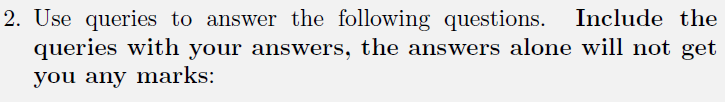

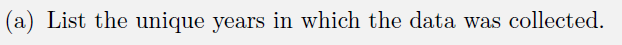

**(a) List the unique years in which the data was collected.**

In [39]:
years = [
    {"$group": {
        "_id": {"year": {"$year": "$date_published"}},
    }},
    {"$project": {
        "_id": 0,
        "year": "$_id.year"
    }},
    {"$sort": {"year": 1}} # Sort by year in ascending order
]


result = list(collection.aggregate(years))

# Print the result
for item in result:
    print(item['year'])

2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


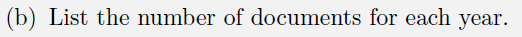

**(b) List the number of documents for each year.**

In [40]:
pipeline_2 = [
    {"$group": {"_id": {"year": {"$year": "$date_published"}, "filename": "$filename"}, "count": {"$sum": 1}}},
    {"$group": {"_id": {"year": "$_id.year"}, "count": {"$sum": "$count"}, "filenames": {"$addToSet": "$_id.filename"}}},
    {"$sort": {"_id.year": 1}}
]

result_2 = list(collection.aggregate(pipeline_2))
#print(result)
for i in result_2:
  print("The list are as follows:")
  print(i)

The list are as follows:
{'_id': {'year': 2013}, 'count': 4, 'filenames': ['refs_Machine learning - Wikipedia_2013_6_27', 'article_Machine learning - Wikipedia_2013_1_2', 'article_Machine learning - Wikipedia_2013_6_27', 'refs_Machine learning - Wikipedia_2013_1_2']}
The list are as follows:
{'_id': {'year': 2014}, 'count': 4, 'filenames': ['refs_Machine learning - Wikipedia_2014_6_4', 'article_Machine learning - Wikipedia_2014_6_4', 'refs_Machine learning - Wikipedia_2014_1_4', 'article_Machine learning - Wikipedia_2014_1_4']}
The list are as follows:
{'_id': {'year': 2015}, 'count': 4, 'filenames': ['article_Machine learning - Wikipedia_2015_6_30', 'article_Machine learning - Wikipedia_2015_1_4', 'refs_Machine learning - Wikipedia_2015_1_4', 'refs_Machine learning - Wikipedia_2015_6_30']}
The list are as follows:
{'_id': {'year': 2016}, 'count': 4, 'filenames': ['refs_Machine learning - Wikipedia_2016_6_30', 'article_Machine learning - Wikipedia_2016_6_30', 'article_Machine learning 

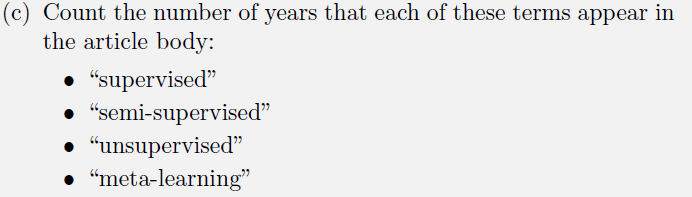

**(C.1) Counting the number of years the term "supervised" has appeared in**

In [41]:
pipeline_3 = [
    {"$match": {"supervised": "Yes"}},
    {"$group": {"_id": {"year": {"$year": "$date_published"}}, "count": {"$sum": 1}}},
    {"$group": {"_id": None, "total_count": {"$sum": 1}}},
]

result_3 = list(collection.aggregate(pipeline_3))
print("total number of years:", result_3[0]["total_count"])


total number of years: 11


**(C.2) Counting the number of years the term "semi-supervised" has appeared in**

In [42]:
pipeline_4 = [
    {"$match": {"semi-supervised": "Yes"}},
    {"$group": {"_id": {"year": {"$year": "$date_published"}}, "count": {"$sum": 1}}},
    {"$group": {"_id": None, "total_count": {"$sum": 1}}},
]

result_4 = list(collection.aggregate(pipeline_4))
print("total number of years:", result_4[0]["total_count"])

total number of years: 5


**(C.3) Counting the number of years the term "unsupervised" has appeared in**

In [43]:
pipeline_5 = [
    {"$match": {"unsupervised": "Yes"}},
    {"$group": {"_id": {"year": {"$year": "$date_published"}}, "count": {"$sum": 1}}},
    {"$group": {"_id": None, "total_count": {"$sum": 1}}},
]

result_5 = list(collection.aggregate(pipeline_5))
print("total number of years:", result_5[0]["total_count"])

total number of years: 11


**(C.4) Counting the number of years the term "meta-learning" has appeared in**

In [44]:
pipeline_6 = [
    {"$match": {"meta-learning": "Yes"}},
    {"$group": {"_id": {"year": {"$year": "$date_published"}}, "count": {"$sum": 1}}},
    {"$group": {"_id": None, "total_count": {"$sum": 1}}},
]

result_6 = list(collection.aggregate(pipeline_6))
print("total number of years:", result_6[0]["total_count"])

total number of years: 2


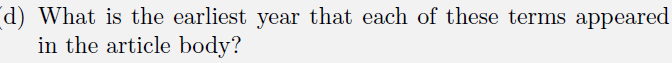

**(d.1)Find the earliest year the term "supervised" appeared**

In [45]:
pipeline_7 = [
    {"$match": {"supervised": "Yes"}},
    {"$group": {"_id": None, "earliest_year": {"$min": {"$year": "$date_published"}}}}
]

result_7 = list(collection.aggregate(pipeline_7))
earliest_year = result_7[0]["earliest_year"]
print("The earliest year where supervised is Yes :", earliest_year)


The earliest year where supervised is Yes : 2013


**(d.2)Find the earliest year the term "semi-supervised" appeared**

In [46]:
pipeline_8 = [
    {"$match": {"semi-supervised": "Yes"}},
    {"$group": {"_id": None, "earliest_year": {"$min": {"$year": "$date_published"}}}}
]

result_8 = list(collection.aggregate(pipeline_8))
earliest_year = result_8[0]["earliest_year"]
print("The earliest year where semi-supervised is Yes is:", earliest_year)


The earliest year where semi-supervised is Yes is: 2015


**(d.3)Find the earliest year the term "unsupervised" appeared**

In [47]:
pipeline_9 = [
    {"$match": {"unsupervised": "Yes"}},
    {"$group": {"_id": None, "earliest_year": {"$min": {"$year": "$date_published"}}}}
]

result_9 = list(collection.aggregate(pipeline_9))
earliest_year = result_9[0]["earliest_year"]
print("The earliest year where unsupervised is Yes is:", earliest_year)


The earliest year where unsupervised is Yes is: 2013


**(d.4)Find the earliest year the term "meta-learning" appeared**

In [48]:
pipeline_10 = [
    {"$match": {"meta-learning": "Yes"}},
    {"$group": {"_id": None, "earliest_year": {"$min": {"$year": "$date_published"}}}}
]

result_10 = list(collection.aggregate(pipeline_10))
earliest_year = result_10[0]["earliest_year"]
print("The earliest year where meta-learning is Yes is:", earliest_year)


The earliest year where meta-learning is Yes is: 2022


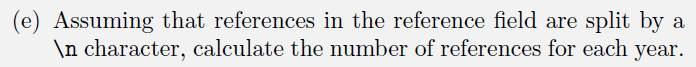

**(e)counting the references for each year**

In [49]:
pipeline_11 = [
    {"$match": {"filename": {"$regex": "^refs_Machine learning"}}},
    {"$group": {
        "_id": {"year": {"$year": "$date_published"}},
        "total_refs": {"$sum": "$count_of_refs"},
        "count": {"$sum": 1}
    }},
    {"$sort": {"_id.year": 1}}
]

result_11 = list(collection.aggregate(pipeline_11))

for item in result_11:
    print(item)


{'_id': {'year': 2013}, 'total_refs': 18, 'count': 2}
{'_id': {'year': 2014}, 'total_refs': 27, 'count': 2}
{'_id': {'year': 2015}, 'total_refs': 55, 'count': 2}
{'_id': {'year': 2016}, 'total_refs': 63, 'count': 2}
{'_id': {'year': 2017}, 'total_refs': 85, 'count': 2}
{'_id': {'year': 2018}, 'total_refs': 105, 'count': 2}
{'_id': {'year': 2019}, 'total_refs': 171, 'count': 2}
{'_id': {'year': 2020}, 'total_refs': 191, 'count': 2}
{'_id': {'year': 2021}, 'total_refs': 239, 'count': 2}
{'_id': {'year': 2022}, 'total_refs': 260, 'count': 2}
{'_id': {'year': 2023}, 'total_refs': 282, 'count': 2}


In [50]:
#client.drop_database(db)

In [51]:
#client.list_database_names()